# Compare the estimates produced by me for Laube et al. to Vollmer et al. past estimates

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

In [23]:
species_list = ["CFC-115","CFC-114","CFC-13"]
def read_vollmer(species):
    path = "/user/home/lw13938/work/minorCFCs/Vollmerestimates/"
    df = pd.read_csv(path+f"emissions_{species}.csv", skiprows=3,sep=",")
    return df['Time'].values, df[' Global emissions (Gg/yr)'], df[' 16%ile'],  df[' 84%ile']

def read_laube(species):
    lpath = Path("/user/home/lw13938/work/py12box_laube/data_agage/")
    df = pd.read_csv(lpath / species / f"outputs/{species}_Global_annual_emissions.csv", comment="#")
    return df.Decimal_date, df.Global_annual_emissions, df.Global_annual_emissions-df["Global_annual_emissions_1-sigma"],df.Global_annual_emissions+df["Global_annual_emissions_1-sigma"]  

def read_wmo(species):
    apath = Path("/user/home/lw13938/work/py12box_agage/data/")
    df = pd.read_csv(apath / species / f"outputs/{species}_Global_annual_emissions.csv", comment="#")
    return df.Decimal_date, df.Global_annual_emissions, df.Global_annual_emissions-df["Global_annual_emissions_1-sigma"],df.Global_annual_emissions+df["Global_annual_emissions_1-sigma"] 

def read_cgo(species):
    cpath = Path("/user/home/lw13938/work/py12box_laube/data/")
    df = pd.read_csv(cpath / species / f"outputs/{species}_Global_annual_emissions.csv", comment="#")
    df2 = pd.read_csv(cpath / f"{species}a" / f"outputs/{species}a_Global_annual_emissions.csv", comment="#")
    df = df + df2
    return df.Decimal_date/2, df.Global_annual_emissions, df.Global_annual_emissions-df["Global_annual_emissions_1-sigma"],df.Global_annual_emissions+df["Global_annual_emissions_1-sigma"]  

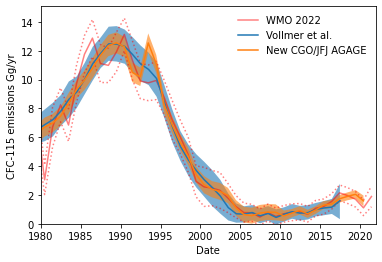

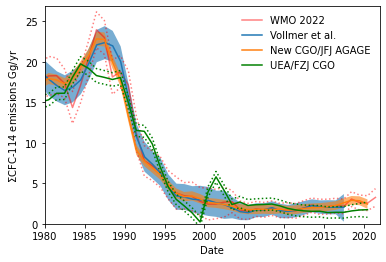

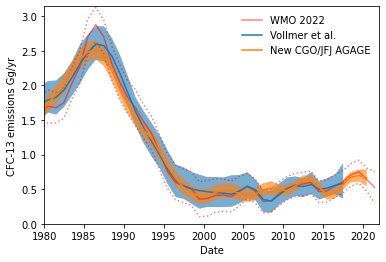

In [26]:
for species in species_list:    
    vtime, vemis, vlow, vup = read_vollmer(species)
    ltime, lemis, llow, lup = read_laube(species)
    atime, aemis, alow, aup = read_wmo(species)
    if species == "CFC-114":
        ctime, cemis, clow, cup = read_cgo(species)
    plt.figure()
    plt.plot(atime, aemis, "r", label="WMO 2022", alpha=0.5 )
    plt.plot(atime, alow,  "r:", alpha=0.5)
    plt.plot(atime, aup, "r:", alpha=0.5)
    plt.plot(vtime, vemis, label="Vollmer et al.")
    plt.fill_between(vtime, vlow, vup, alpha=0.6)
    plt.plot(ltime, lemis, label="New CGO/JFJ AGAGE")
    plt.fill_between(ltime, llow, lup, alpha=0.6)
    if species == "CFC-114":
        plt.plot(ctime, cemis, "g", label="UEA/FZJ CGO" )
        plt.plot(ctime, clow,  "g:")
        plt.plot(ctime, cup, "g:")
        species = "$\Sigma$"+species

    
    plt.xlim(1980, 2022)
    ymax = np.max(np.r_[lup.values, vup.values])*1.1
    plt.ylim(0, ymax)
    plt.ylabel(f"{species} emissions Gg/yr")
    plt.xlabel("Date")
    plt.legend(frameon=False)
    plt.savefig()
    plt.savefig(f"/user/home/lw13938/work/minorCFCs/Figs/"+pd.to_datetime("today").strftime("%Y-%m-%d")+f"_{species}_compareemissions.png", dpi=200)

In [22]:
ctime/2


0     1978.46
1     1979.46
2     1980.46
3     1981.46
4     1982.46
5     1983.46
6     1984.46
7     1985.46
8     1986.46
9     1987.46
10    1988.46
11    1989.46
12    1990.46
13    1991.46
14    1992.46
15    1993.46
16    1994.46
17    1995.46
18    1996.46
19    1997.46
20    1998.46
21    1999.46
22    2000.46
23    2001.46
24    2002.46
25    2003.46
26    2004.46
27    2005.46
28    2006.46
29    2007.46
30    2008.46
31    2009.46
32    2010.46
33    2011.46
34    2012.46
35    2013.46
36    2014.46
37    2015.46
38    2016.46
39    2017.46
40    2018.46
41    2019.46
42    2020.46
Name: Decimal_date, dtype: float64